In [7]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("TSLA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [10]:
data.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000   

     

In [28]:
data.shape

(2416, 6)

In [31]:
data.drop('Adj Close',axis=1,inplace=True)

KeyError: "['Adj Close'] not found in axis"

In [32]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [38]:
data.isnull().sum

<bound method DataFrame.sum of        Date   Open   High    Low  Close  Volume
0     False  False  False  False  False   False
1     False  False  False  False  False   False
2     False  False  False  False  False   False
3     False  False  False  False  False   False
4     False  False  False  False  False   False
...     ...    ...    ...    ...    ...     ...
2411  False  False  False  False  False   False
2412  False  False  False  False  False   False
2413  False  False  False  False  False   False
2414  False  False  False  False  False   False
2415  False  False  False  False  False   False

[2416 rows x 6 columns]>

In [36]:
data.notnull().sum()

Date      2416
Open      2416
High      2416
Low       2416
Close     2416
Volume    2416
dtype: int64

In [39]:
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [41]:
data.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


In [42]:
print(len(data))

2416


In [ ]:
training_set=data.iloc[:,1:2]

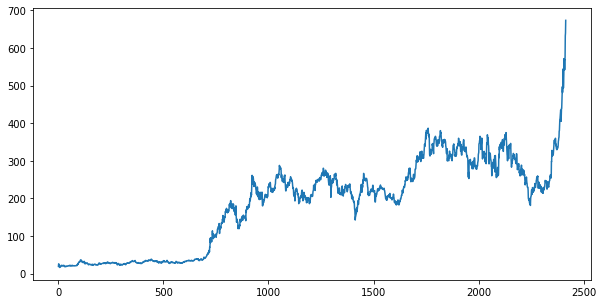

In [53]:
data['Open'].plot(figsize=(10,5))

In [54]:
x=data[['Open','High','Low','Volume']]
x

,Open,High,Low,Volume
0,19.000000,25.000000,17.540001,18766300
1,25.790001,30.420000,23.299999,17187100
2,25.000000,25.920000,20.270000,8218800
3,23.000000,23.100000,18.709999,5139800
4,20.000000,20.000000,15.830000,6866900
...,...,...,...,...
2411,568.489990,576.809998,558.080017,11788500
2412,575.690002,589.799988,567.429993,17801500
2413,632.419983,650.880005,618.000000,29005700
2414,640.000000,653.000000,632.520020,15719300


In [58]:
# x=data[['Open','High','Low','Volume']]
y=data['Close']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [62]:
print(x_train.shape)

(1812, 4)


In [63]:
print(x_test.shape)

(604, 4)


In [64]:
print(y_train.shape)

(1812,)


In [65]:
print(y_test.shape)

(604,)


In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1932, 4)
(484, 4)
(1932,)
(484,)


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2174, 4)
(242, 4)
(2174,)
(242,)


In [73]:
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

Open      1.856693e+02
High      1.889244e+02
Low       1.823119e+02
Volume    5.593291e+06
dtype: float64
Open      1.916774e+02
High      1.954517e+02
Low       1.883493e+02
Volume    5.387936e+06
dtype: float64
185.74858329622802
192.28843059090897


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [80]:
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

Open      1.862656e+02
High      1.895144e+02
Low       1.829195e+02
Volume    5.536279e+06
dtype: float64
Open      1.863214e+02
High      1.901517e+02
Low       1.828909e+02
Volume    5.900101e+06
dtype: float64
186.3380176274145
186.99326432644625


In [5]:
import pandas as pd
data=pd.read_csv("TSLA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
data.drop('Adj Close',axis=1,inplace=True)

In [8]:
x=data[['Open','High','Low','Volume']]
x

,Open,High,Low,Volume
0,19.000000,25.000000,17.540001,18766300
1,25.790001,30.420000,23.299999,17187100
2,25.000000,25.920000,20.270000,8218800
3,23.000000,23.100000,18.709999,5139800
4,20.000000,20.000000,15.830000,6866900
...,...,...,...,...
2411,568.489990,576.809998,558.080017,11788500
2412,575.690002,589.799988,567.429993,17801500
2413,632.419983,650.880005,618.000000,29005700
2414,640.000000,653.000000,632.520020,15719300


In [14]:
x=data[['Open','High','Low','Volume']]
y=data['Close']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [19]:
x_train.shape

(1932, 4)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [22]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train)

TypeError: confusion_matrix() missing 1 required positional argument: 'y_pred'

In [33]:
##Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

In [ ]:
Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

In [34]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print(regressor.coef_)

[-6.40878154e-01  8.44926735e-01  7.95604389e-01  8.50437893e-09]


In [38]:
print(regressor.intercept_)

-0.017167688059430475


In [39]:
predicted=regressor.predict(x_test)

In [40]:
print(predicted)

[ 29.82098141 235.19801605 364.75096469  24.95896776 247.63924803
 336.91847741 221.99334702 204.86617192 211.64377772 295.20580659
 381.9556288   35.02663322 368.84242     30.9866251  278.98802032
 257.11867026  25.88869821  37.6930338  180.92760813  31.40239954
 252.36764517 286.16430706  32.33497185  21.38022926  16.89531696
 341.11793864 232.49669023  33.91840001 291.89946029  23.12445312
  30.3748731  341.91726739 354.16920695 247.65152956  29.62444252
 251.35512073 203.69116428 318.70071028 262.01311725  37.21289368
  34.11451288 197.43867196 413.3703522   25.0032551   16.71662014
  26.0445507   32.18698549 202.93382591 189.58301006  34.84520178
 253.20480736 250.39587623 227.13781282 248.01397251 336.1377739
 211.65197008 245.44548176 208.50291264 205.85774555  31.11838638
 178.53836082 326.8743077  307.16207269  29.49468955 275.0094729
 208.93511548  34.0194598  146.29152182  23.9872619  300.56439687
 313.68549645  32.0719199   83.25443213 188.60109777 228.30311088
 199.5839678

In [41]:
print(x_test)

            Open        High         Low   Volume
535    29.309999   29.940001   29.309999   707400
936   241.389999  241.550003  233.509995  5071300
1814  364.489990  368.760010  360.399994  5972900
297    24.799999   25.500000   24.280001   823800
1065  255.000000  256.019989  244.710007  8214100
...          ...         ...         ...      ...
1644  228.970001  231.919998  228.000000  3979500
375    27.910000   28.070000   26.030001  1705500
1178  202.850006  206.190002  200.149994  4877000
644    34.740002   34.779999   33.820000  3555100
1554  216.110001  216.110001  210.520004  3168900

[484 rows x 4 columns]


In [43]:
predicted.shape

(484,)

In [46]:
dframe=pd.DataFrame(y_test,predicted)

In [55]:
dframe=pd.DataFrame({'Actual price':y_test,'Predicted Price':predicted})

In [52]:
print(dframe)

      Actual price  Predicted Price
535      29.940001        29.820981
936     235.839996       235.198016
1814    362.750000       364.750965
297      24.740000        24.958968
1065    250.029999       247.639248
...            ...              ...
1644    231.279999       230.628011
375      27.570000        26.537104
1178    200.630005       203.477830
644      34.520000        34.042849
1554    211.339996       211.597360

[484 rows x 2 columns]


In [56]:
dfr.head(100)

,Actual price,Predicted Price
535,29.940001,29.820981
936,235.839996,235.198016
1814,362.750000,364.750965
297,24.740000,24.958968
1065,250.029999,247.639248
...,...,...
1807,355.899994,356.995692
1036,259.320007,262.040269
1746,352.850006,353.390740
791,149.580002,148.277852


In [57]:
dfr.tail(50)

,Actual price,Predicted Price
1664,257.480011,258.240439
1729,323.100006,322.484553
645,35.189999,35.144962
2359,345.089996,346.774384
2248,196.589996,195.471625
712,54.939999,54.039402
1343,212.960007,210.656082
899,174.600006,176.621432
2030,303.200012,297.759468
845,176.809998,174.445654


In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [59]:
regressor.score(x_test,y_test)

0.9997057489996263

In [67]:
import math
import sklearn.metrics as metrics

In [70]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 1.4127118739489621


In [71]:

print('Mean Squared Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Squared Error: 1.4127118739489621


In [74]:

print('Root Mean_Squared_erro:',math.sqrt(metrics.mean_squared_error(y_test,predicted))

SyntaxError: unexpected EOF while parsing (<ipython-input-74-9ecc5dd19404>, line 1)

In [76]:
graph=dfr.head(20)

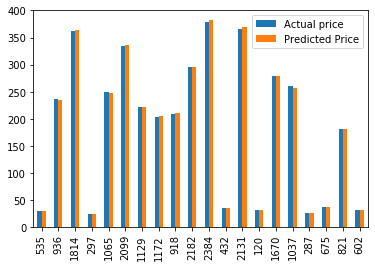

In [77]:
graph.plot(kind='bar')